# Project: St. Maarten Price Data Prediction 

<p>Project Description: A project to explore St. Maarten's CPI product price data create visualizations of the data and use predictive modelling on the data.</p>

## Loading & Transformations

In [3]:
# Importing required libbrairies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
# Loading data set & intial preview. 
# Create Dirty multi-machine file path loads.
M_PATH = ['/home/m-zero/projects/St.Maarten_CPI_Product_Price_Prediction/data/St_Maarten_CPI_2001-2017.csv','/home/m-zero/projects/St.Maarten_CPI_Product_Price_Prediction/data/Saba_CPI_2010-2022.csv','/home/m-zero/projects/St.Maarten_CPI_Product_Price_Prediction/data/Bonaire_CPI_2010-2022.csv',
          '/home/m-zero/projects/St.Maarten_CPI_Product_Price_Prediction/data/St_Eustatius_CPI_2010-2022.csv','/home/m-zero/projects/St.Maarten_CPI_Product_Price_Prediction/data/Netherands_CPI_2010-2022.csv']
df_sxm = pd.read_csv( M_PATH[0], sep = ';')
df_sa  = pd.read_csv( M_PATH[1], sep = ';', quotechar='"', skiprows=3, header=2)
df_bo  = pd.read_csv( M_PATH[2], sep = ';', quotechar='"', skiprows=3, header=2)
df_se  = pd.read_csv( M_PATH[3], sep = ';', quotechar='"', skiprows=3, header=2)
df_nl  = pd.read_csv( M_PATH[4], sep = ';', quotechar='"', skiprows=3, header=1)

In [67]:
# # Loading data set & intial preview. 
# # Create Dirty multi-machine file path loads.
# M_PATH = ['/home/m-one/projects/St.Maarten_CPI_Product_Price_Prediction/data/St_Maarten_CPI_2001-2017.csv','/home/m-one/projects/St.Maarten_CPI_Product_Price_Prediction/data/Saba_CPI_2010-2022.csv','/home/m-one/projects/St.Maarten_CPI_Product_Price_Prediction/data/Bonaire_CPI_2010-2022.csv',
#           '/home/m-one/projects/St.Maarten_CPI_Product_Price_Prediction/data/St_Eustatius_CPI_2010-2022.csv','/home/m-one/projects/St.Maarten_CPI_Product_Price_Prediction/data/Netherands_CPI_2010-2022.csv']
# df_sxm = pd.read_csv( M_PATH[0], sep = ';')
# df_sa  = pd.read_csv( M_PATH[1], sep = ';', quotechar='"', skiprows=3, header=2)
# df_bo  = pd.read_csv( M_PATH[2], sep = ';', quotechar='"', skiprows=3, header=2)
# df_se  = pd.read_csv( M_PATH[3], sep = ';', quotechar='"', skiprows=3, header=2)
# df_nl  = pd.read_csv( M_PATH[4], sep = ';', quotechar='"', skiprows=3, header=2)

### Micro-Ans Transformations - Bonaire, Saba, St. Eustatius and The Netherlands Data

In [85]:
# isolate the independant value columns for merging to a single dataframe.
df_sa_values = df_sa[['2017=100']].rename(columns={'2017=100': 'Saba Yr CPI'}).dropna()
df_bo_values = df_bo[['2017=100']].rename(columns={'2017=100': 'Bonaire Yr CPI'}).dropna()
df_se_values = df_se[['2017=100']].rename(columns={'2017=100': 'St. Eustatius  Yr CPI'}).dropna()
df_nl_values = df_nl[['2015 = 100']].rename(columns={'2015 = 100': 'The Netherlands Yr CPI'}).dropna()

# Final values dataframe of all countries CPI
cpi_per_loc_per_year = pd.concat([df_sa_values, df_bo_values, df_se_values, df_nl_values], axis= 1 )
display(cpi_per_loc_per_year)

,Saba Yr CPI,Bonaire Yr CPI,St. Eustatius Yr CPI,The Netherlands Yr CPI
0,87.52,89.23,81.62,91.59
1,93.13,93.98,89.71,93.73
2,96.61,96.71,94.49,96.04
3,97.77,98.39,96.70,98.44
4,99.73,99.83,99.19,99.40
5,100.18,98.90,98.22,100.00
6,100.23,99.43,98.13,100.32
7,100.00,100.00,100.00,101.70
8,102.63,103.44,101.35,103.44
9,103.17,104.78,102.07,106.16


### Micro-Ans Transformations - St. Maarten Data

In [155]:
reduce_frame = df_sxm.drop(index= [0,1,11,14,17,23,31,33,38,44] )
display('')

Expenditure category     TOTAL
2000                     89,93
2001                     90,84
2002                     91,32
2003                     92,82
2004                     94,78
2005                     97,72
2006                     99,96
2007                    102,30
2008                    106,97
2009                    107,76
2010                    111,20
2011                    116,30
2012                    120,97
2013                    124,03
2014                    126,37
2015                    126,79
2016                    126,94
2017                    129,73
Name: 0, dtype: object


### Prediction Transformations - St. Maarten Data

In [6]:
# Missing Values Check
display(df_sxm.isnull().sum())

Expenditure category    0
2000                    0
2001                    0
2002                    0
2003                    0
2004                    0
2005                    0
2006                    0
2007                    0
2008                    0
2009                    0
2010                    0
2011                    0
2012                    0
2013                    0
2014                    0
2015                    0
2016                    0
2017                    0
dtype: int64

In [7]:
# Drop Data Classifiers and Totals
df_drop_classif = df_sxm.drop(index= [0,1,11,14,17,23,31,33,38,44] )
df_drop_classif_column = df_drop_classif.drop(columns= ['Expenditure category'] )

In [8]:

# Replace ',' for '.' allowing objects to be converted to numeric-float values
columns = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']
columns_b = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014','2015','2016','2017']

# Replace currency "," --> '.' for conversion to float data type
for col in columns:
    df_drop_classif_column[col] = df_drop_classif_column[col].str.replace(',','.')
    df_drop_classif_column[col] = df_drop_classif_column[col].astype(float)

for col_b in columns_b:
    df_drop_classif[col_b] = df_drop_classif[col_b].str.replace(',','.')
    df_drop_classif[col_b] = df_drop_classif[col_b].astype(float)
    

df = df_drop_classif_column # Time series 
df_     = df_drop_classif.drop(columns= ['Expenditure category'] ) # No Categorical
df_full = df_drop_classif   # Full dataset


## Exploratory Data Analysis

#### Micro Exploration & Analysis - Saba, St. Eustatius, Bonair, St. Maarten & the Netherlands Yearly CPI Plot

<p>A Micro Analysis to visualize the difference in CPI movment from the avaiable years from 2010 - 2017 or 2022 from The netherlands. Saba, St.Eustatius, Bonair and St. Maarten. <p>

<Axes: >

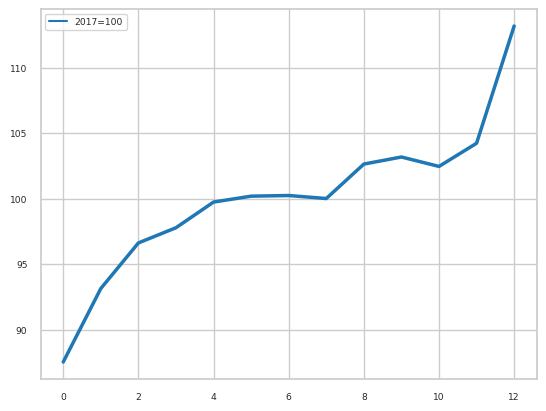

In [9]:
# Visualising the rise or fall in data deviation - Saba
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=df_sa, palette="tab10", linewidth=2.5)

<Axes: >

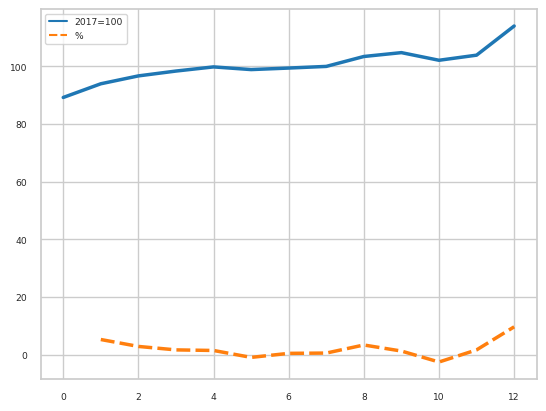

In [10]:
# Visualising the rise or fall in data deviation - Bonaire
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=df_bo, palette="tab10", linewidth=2.5)

<Axes: >

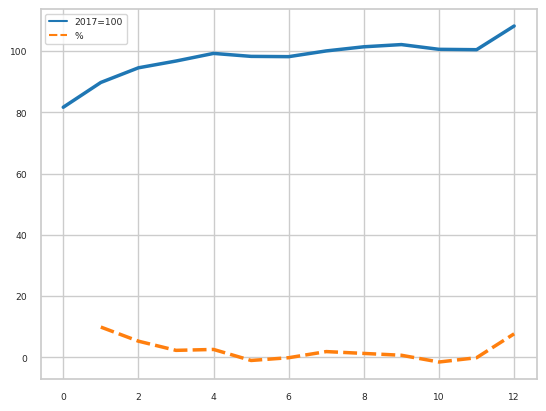

In [11]:
# Visualising the rise or fall in data deviation - St. Eustatius
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=df_se, palette="tab10", linewidth=2.5)

<Axes: >

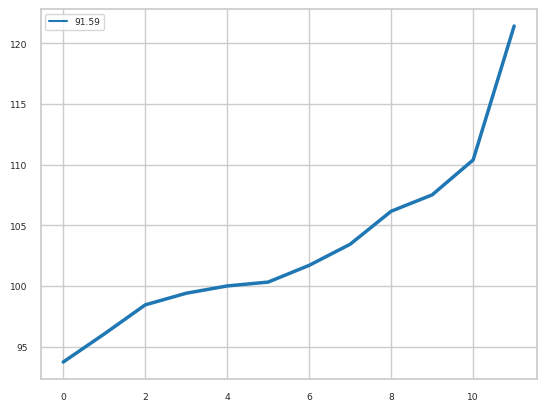

In [12]:
# Visualising the rise or fall in data deviation - St. Eustatius
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=df_nl, palette="tab10", linewidth=2.5)

<Axes: >

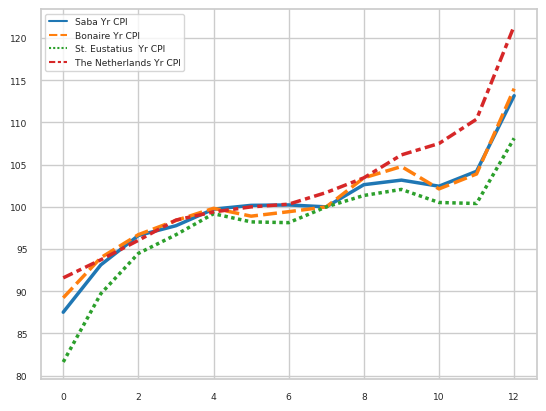

In [89]:
# Visualising the combined 
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=cpi_per_loc_per_year, palette="tab10", linewidth=2.5)

#### Prediction Exploration & Analysis: Data Set Exploration to figure out the best formation and predictors for the missing year of 2018.

#####  Outlier Detection & Removal

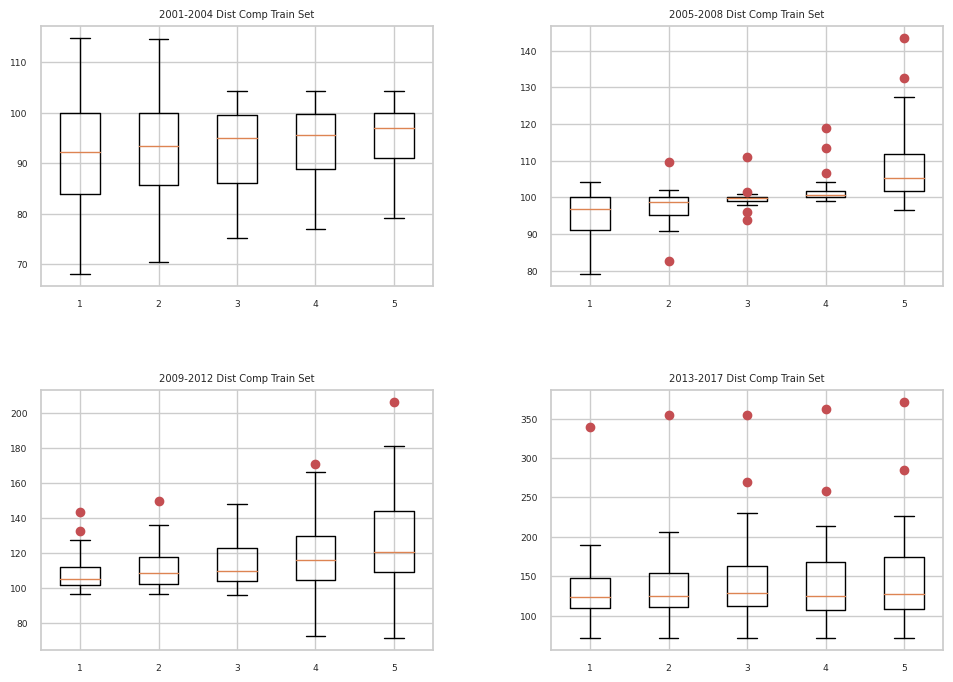

In [13]:
# Outlier Visual Detection
fig, axs = plt.subplots(2,2)

axs[0,0].set_title('2001-2004 Dist Comp Train Set')
axs[0,0].boxplot(df[['2000','2001','2002','2003','2004']],0,'r')

axs[0,1].set_title('2005-2008 Dist Comp Train Set')
axs[0,1].boxplot(df[['2004','2005','2006','2007','2008']],0,'r')

axs[1,0].set_title('2009-2012 Dist Comp Train Set')
axs[1,0].boxplot(df[['2008','2009','2010','2011','2012']],0,'r')

axs[1,1].set_title('2013-2017 Dist Comp Train Set')
axs[1,1].boxplot(df[['2013','2014','2015','2016','2017']],0,'r')


fig.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)


plt.show()

##### IQR Filtering


In [14]:
# Interquarentile Range (IQR) Based Filtering

percentile25 = df.quantile(0.25)
percentile75 = df.quantile(0.75)

iqr = percentile75 - percentile25

upper_limits = percentile75 + 1.5 * iqr
lower_limits = percentile25 - 1.5 * iqr

# Linear Interpolation for missing data (Outliers)
data_no_outliers = df[(df >= lower_limits) & (df <= upper_limits)]
data_no_outliers_interp = data_no_outliers.interpolate(method='linear', order= 2)

# Missing Values Check
# display(data_no_outliers_interp.isnull().sum())



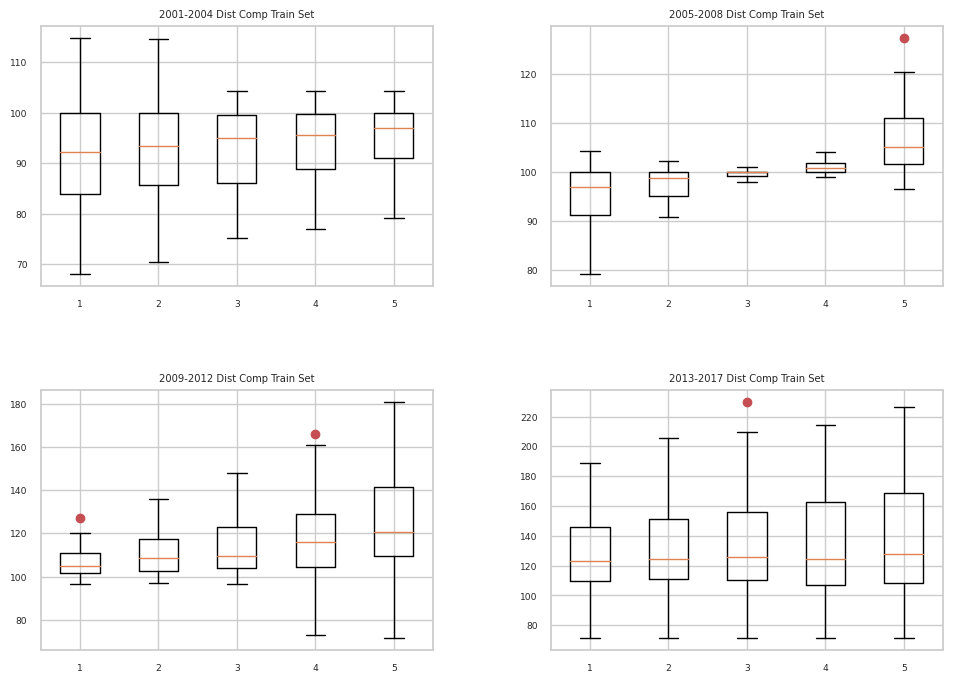

In [15]:
# Outliers Removed Comp

fig1, axs1 = plt.subplots(2,2)

axs1[0,0].set_title('2001-2004 Dist Comp Train Set')
axs1[0,0].boxplot(data_no_outliers_interp[['2000','2001','2002','2003','2004']],0,'r')
axs1[0,1].set_title('2005-2008 Dist Comp Train Set')
axs1[0,1].boxplot(data_no_outliers_interp[['2004','2005','2006','2007','2008']],0,'r')
axs1[1,0].set_title('2009-2012 Dist Comp Train Set')
axs1[1,0].boxplot(data_no_outliers_interp[['2008','2009','2010','2011','2012']],0,'r')
axs1[1,1].set_title('2013-2017 Dist Comp Train Set')
axs1[1,1].boxplot(data_no_outliers_interp[['2013','2014','2015','2016','2017']],0,'r')

fig1.subplots_adjust(left=0.09, right=1.5, bottom=0.1, top= 1.4, hspace=0.4, wspace= 0.3)

plt.show()

##### Data Overview & Statistical Summary

In [16]:
# # Descriptive summary, sata types and data column and feature count using shape.
# # Data Type Check
# display(df_full.dtypes)

# # Data Shape Check
# display(df_full.shape)

# # Statistical Overview Check
# display(df_full.describe())

##### Data Variability - How tightly clustered are the data?

In [17]:
# Standard Deviation 
std_price_index = df_.std()
display(std_price_index)

2000    11.093785
2001    10.583208
2002     8.502278
2003     7.403602
2004     6.347285
2005     4.178342
2006     2.284645
2007     3.745731
2008     9.798222
2009    11.776113
2010    13.722210
2011    21.298255
2012    28.467594
2013    43.968323
2014    47.888182
2015    53.721036
2016    53.226417
2017    57.048060
dtype: float64

/tmp/ipykernel_3012/2292518557.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=std_price_index, palette="tab10", linewidth=2.5)


<Axes: >

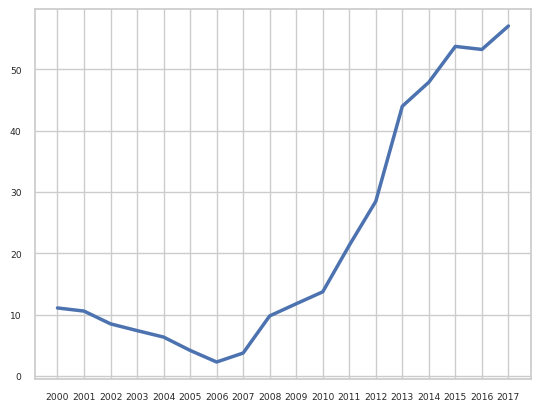

In [18]:
# Visualising the rise or fall in data deviation
sns.set_theme(style="whitegrid", font_scale=.6 )
sns.lineplot(data=std_price_index, palette="tab10", linewidth=2.5)

## Data Transformations

In [19]:
# Datasets for Creating clean data set files /data/dataset - Reminder* Full dataset variable = "data_no_outliers_interp" 
sxmppd_train = data_no_outliers_interp[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014']]
sxmppd_test  = data_no_outliers_interp[['2015','2016','2017']]

# Working Data Sets - Scikit learn Models
df_train = data_no_outliers_interp[['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012', '2013','2014']]
df_test = data_no_outliers_interp[['2015','2016','2017']]


# Export data to sys directory
# sxmppd_train.to_csv('/home/m0linux/Documents/computer_science/Data Science Engineering/sxm price data prediction/data/dataset/sxmppd_train.csv', index=False, header= True,)
# sxmppd_test.to_csv('/home/m0linux/Documents/computer_science/Data Science Engineering/sxm price data prediction/data/dataset/sxmppd_test.csv', index=False, header= True)

## Machine Learning Models

In [20]:
# Importing packages for splitting data for training and evaluations
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
# Split and Shuffle tain and test data sets

X = df_train.drop(columns=['2014'])
y = df_train['2014']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, shuffle=False, stratify=None, random_state= None)


In [22]:
from sklearn.preprocessing import StandardScaler

##### Data Scaling 

In [23]:
from sklearn.preprocessing import StandardScaler

##### StandardScaler Data 

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

#display(scaler.mean_)
#display(scaler.scale_)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


#display(X_scaled.mean(axis=0))
#display(X_scaled.std(axis = 0))


##### Scikit-learn Modeling Algorithms

In [25]:
# Instantiate the random SVR model 
from sklearn.svm import LinearSVR
from sklearn.svm import SVR


###### Support Vector Machine SVR

In [26]:
lin_model = LinearSVR()
lin_model.fit(X_train, y_train)

/home/m-zero/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/m-zero/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [27]:
# Cross Validation with skit test set
y_pred = lin_model.predict(X_test)
print(y_pred)
print('LinearSVR Trainig Score: {:2f}'.format(lin_model.score(X_train, y_train)))
print('LinearSVR Test Score: {:2f}'.format(lin_model.score(X_test, y_test)))

[101.26098725  97.14787712 103.15135362 123.60813454 127.27652414
 112.47151216  67.49058288 115.97578023 106.73789909 136.30875803]
LinearSVR Trainig Score: 0.988562
LinearSVR Test Score: 0.955670


##### Linear Algorithms 


In [28]:
# Importing Linear model packages
from sklearn import linear_model

###### Ridge Regression

In [29]:
# Instantiate the Linear Model 
rr = linear_model.Ridge(alpha=0.5)
rr.fit(X_train_scaled,y_train)

Ridge(alpha=0.5)

In [30]:
# exavualting with Ridge Regression
y_pred = rr.predict(X_test_scaled)
print('LinearSVR Trainig Score: {:2f}'.format(rr.score(X_train_scaled, y_train)))
print('Ridge Regression Test Score: {:2f}'.format(rr.score(X_test_scaled, y_test)))

LinearSVR Trainig Score: 0.985465
Ridge Regression Test Score: 0.962997


###### Lasso Regression

In [31]:
lr = linear_model.Lasso()
lr.fit(X_train_scaled,y_train)

Lasso()

In [32]:
# exavualting with Ordinary least Squares 
y_pred_lasso = lr.predict(X_test_scaled)        
print('lr Trainig Score: {:2f}'.format(lr.score(X_train_scaled, y_train)))
print('lr Test Score: {:2f}'.format(lr.score(X_test_scaled, y_test)))

lr Trainig Score: 0.982244
lr Test Score: 0.969551


##### Results

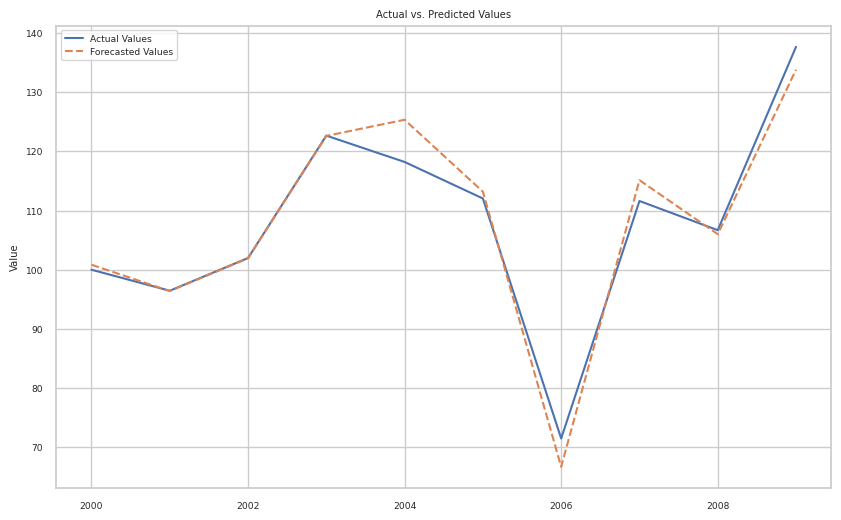

In [33]:
# Support Vector Algorithm Comparison Results

years = range(2000, 2000 + len(X_test))  # Assuming the data starts from 2018

plt.figure(figsize=(10, 6))
plt.plot(years, y_test, label='Actual Values')
plt.plot(years, y_pred, label='Forecasted Values', linestyle='dashed')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()